In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu datasets
df = pd.read_csv('hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Xem tổng số hàng và cột của dataset
df.shape

(119390, 36)

In [5]:
# Kiểm tra giá trị null
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [6]:
# Lấy ra giá trị duy nhất của children
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [7]:
# Thay tất cả các giá trị nal trong children tương tự với còn lại bằng 0
df.dropna(axis=0, inplace=True, subset=['children'])
df.dropna(axis=0, inplace=True, subset=['country'])
df['agent'].replace(np.nan, 'No agent', inplace=True)
df['company'].replace(np.nan, 'No company', inplace=True)

In [8]:
# Giá trị sau khi thay thế
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

<AxesSubplot:xlabel='arrival_date_year'>

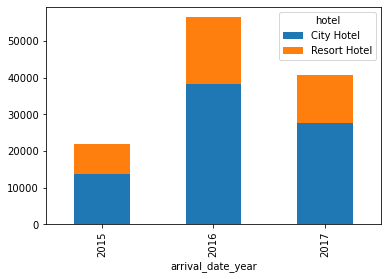

In [9]:
# Thống kê tương quan giữa city&Resort Hotel
pd.pivot_table(df, index = 'arrival_date_year', columns = 'hotel', values = 'name', aggfunc = 'count').plot(kind = 'bar', stacked = True)

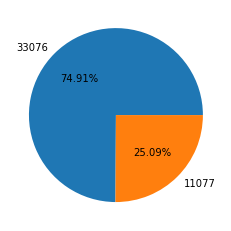

In [21]:
# Thống kế số lượng hủy lịch đặt phòng giữa city&Resort
booking_canceled = df.groupby('hotel')['is_canceled'].sum()
plt.pie(booking_canceled, labels = booking_canceled,autopct='%1.2f%%')
plt.show()

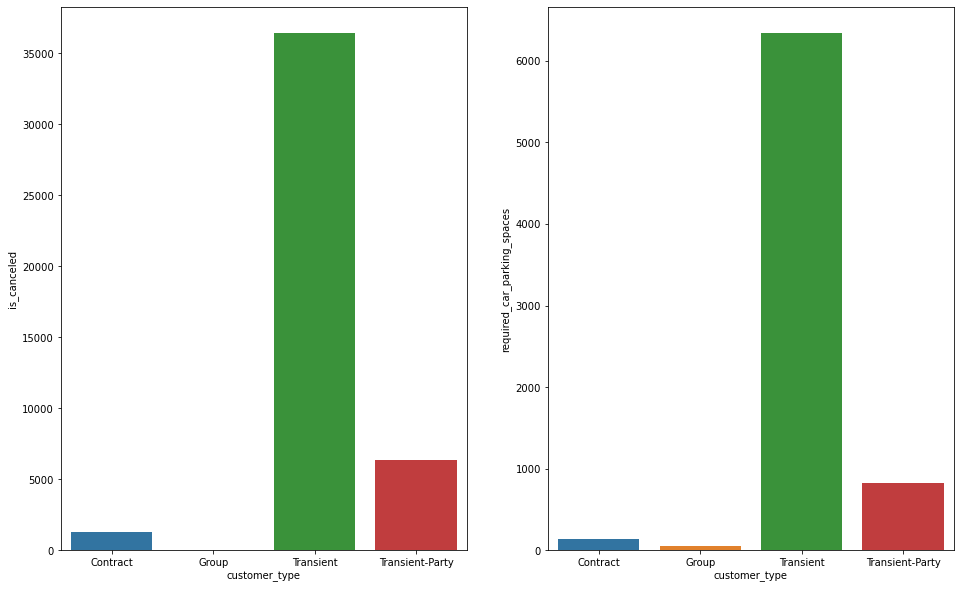

In [30]:
# Khách hàng tạm thời có xu hướng hủy và yêu cầu chỗ đậu xe
total_canceled_by_customer_type = df.groupby('customer_type')['is_canceled'].sum().reset_index()
total_parking_required_by_customer_type = df.groupby('customer_type')['required_car_parking_spaces'].sum().reset_index()
plt.figure(figsize=(16,10))
ax1=plt.subplot(121)
sns.barplot(data = total_canceled_by_customer_type, x = 'customer_type', y ='is_canceled')
ax2=plt.subplot(122)
sns.barplot(data = total_parking_required_by_customer_type, x = 'customer_type', y ='required_car_parking_spaces')
plt.show()

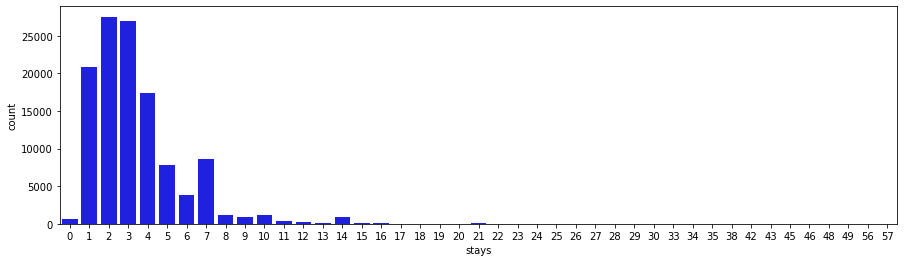

Số ngày booking từ 1-4 ngày chiếm đa số vì thế nên có nhiều combo cho những ngày để tăng doanh thu!


In [35]:
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(15,4))
sns.countplot(x=df['stays'], color='blue')
plt.show()
print("Số ngày booking từ 1-4 ngày chiếm đa số vì thế nên có nhiều combo cho những ngày để tăng doanh thu!")

([<matplotlib.patches.Wedge at 0x191567b9250>,
 [Text(-0.43257116525214745, 1.0113763824572926, 'Not Canceled'),
  Text(0.43257125994403606, -1.0113763419570527, 'Canceled')],
 [Text(-0.23594790831935314, 0.551659844976705, '62.86%'),
  Text(0.23594795996947418, -0.5516598228856651, '37.14%')])

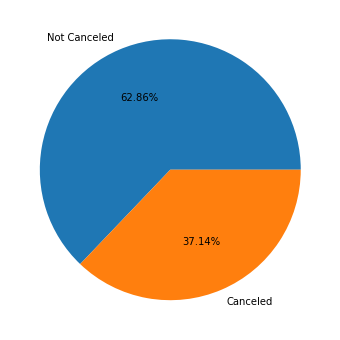

In [39]:
# Tỷ lệ không hủy /hủy đặt phòng
num_can= df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.2f%%')

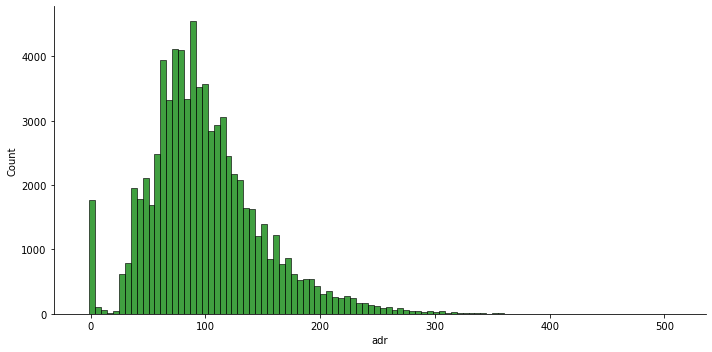

In [45]:
# Trực quan số khách hàng đã thực sự trả tiền nhưng hủy phòng
sns.displot(data = df[df['is_canceled'] == 0], x = 'adr', height = 5, aspect= 2
            
            , bins = 100, color = 'green')

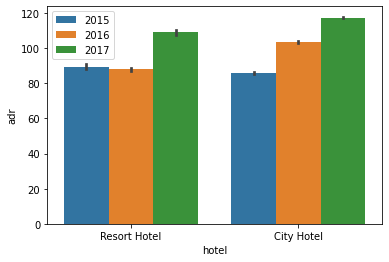

In [50]:
# Số khách qua các năm
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_year')
plt.legend()

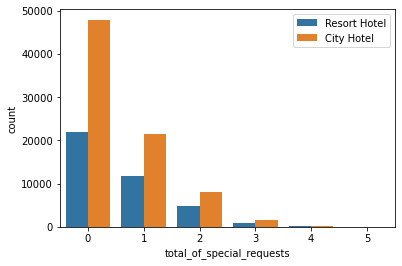

In [49]:
# Số lượng request của Resort/City
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel')
plt.legend()